# Introduction: Using Trained Model

The purpose of this noteobook is to use the trained word level model in order to make predictions. We can look at using both the model trained with pre-trained embeddings and the model with embeddings that were trained from scratch.

In [14]:
from keras import Model
from keras.models import load_model

import numpy as np
import pandas as pd

In [4]:
model = load_model('../models/word-level-pre-trained_2.h5')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 100)         1611500   
_________________________________________________________________
masking_1 (Masking)          (None, None, 100)         0         
_________________________________________________________________
lstm_1 (LSTM)                (None, None, 128)         117248    
_________________________________________________________________
time_distributed_1 (TimeDist (None, None, 100)         12900     
_________________________________________________________________
time_distributed_2 (TimeDist (None, None, 16115)       1627615   
Total params: 3,369,263
Trainable params: 1,757,763
Non-trainable params: 1,611,500
_________________________________________________________________


In [6]:
import json
from itertools import chain
import os

data = []

# Iterate through the patents
for file in os.listdir('../data/patents_parsed/'):
    # Open the file and read in every line
    with open(f'../data/patents_parsed/{file}', 'rt') as fin:
        data.append([json.loads(l) for l in fin])

# Flatten list of lists
data = list(chain(*data))

# Filter out Null abstracst and short abstracts
data = [r for r in data if r[0] is not None]
data = [r for r in data if len(r[0]) >= 400]
len(data)

abstracts = [d[0] for d in data]
titles = [d[1] for d in data]

from keras.preprocessing.text import Tokenizer

# Convert words to integer tokens
tokenizer = Tokenizer(lower=True, filters='!"#$%&(),:;.?*+-/@[\\]^_`{|}~\t\n')
tokenizer.fit_on_texts(abstracts)

wc = tokenizer.word_counts

# Word counts as a list
wcs = sorted(wc.items(), key = lambda x: x[1], reverse = True)
len(wc), wcs[:10]

sequences = tokenizer.texts_to_sequences(abstracts)
len(sequences[2]), len(sequences[500])

(110, 142)

In [9]:
pred = model.predict(sequences[1])
pred.shape

(225, 1, 16115)

In [10]:
len(sequences[1])

225

In [23]:
len(abstracts[1].split())

224

In [24]:
true = []
for i in sequences[1]:
    true.append(tokenizer.index_word[i])
    
' '.join(true)

"a system is provided to reduce noise from a signal of speech that is contaminated by noise the present system employs an artificial intelligence that is capable of deciding upon the adjustment of a filter subsystem by distinguishing between noise and speech in the spectrum of the incoming signal of speech plus noise the system does this by testing the pattern of a power or envelope function of the frequency spectrum of the incoming signal the system determines that the fast changing portions of that envelope denote speech whereas the residual is determined to be the frequency distribution of the noise power this determination is done while examining either the whole spectrum or frequency bands thereof regardless of where the maximum of the spectrum lies in another embodiment of the invention a feedback loop is incorporated which provides incremental adjustments to the filter by employing a gradient search procedure to attempt to increase certain speech like features in the system's ou

In [25]:
words = []
idxes = []
for p in pred[:, 0, :]:
    index = np.argmax(p)
    idxes.append(index)
    words.append(tokenizer.index_word[index])
    
' '.join(words)

'plurality includes provided for the the the the plurality the the and is provided the the the system invention includes the input neural system is provided of the of a system the the plurality to the the to the the a and a system the the system data the the and a the system includes of method the to system the the plurality and more to to the system of the the system data the system includes the is system to the of the is to of and of system the provided the the used system of of the system the and method of provided a the of the system the the more of and the and the the system to the system the of a of to the system relates plurality of the provided the is a a the the system to the the plurality of and of the of the and the and the of a system of of system invention includes of a of and the and the of the system data the more of a and of system invention includes the input neural system includes the is provided data system to the the system data the the and a the system invention in

In [26]:
len(words)

225

In [28]:
len(true)

225

In [29]:
def get_model(pretrained = False):
    if pretrained: 
        f = '../models/word-level-pre-trained_2.h5'
    else:
        f = '../models/word-level-training-embeddings_2.h5'
        
    return load_model(f)

In [30]:
model = get_model()

In [34]:
# Convert words to integer tokens
tokenizer = Tokenizer(lower=False, filters='!"#$%&():;/@[\\]^_`{|}~\t\n')
tokenizer.fit_on_texts(abstracts)

wc = tokenizer.word_counts

# Word counts as a list
wcs = sorted(wc.items(), key = lambda x: x[1], reverse = True)
len(wc), wcs[:10]

(28767,
 [('the', 52495),
  ('a', 35564),
  ('of', 31359),
  ('and', 23444),
  ('to', 21404),
  ('for', 12013),
  ('is', 11501),
  ('in', 10477),
  ('The', 9491),
  ('an', 8060)])

In [37]:
sequences = tokenizer.texts_to_sequences(abstracts)
word_index = tokenizer.word_index
index_word = tokenizer.index_word

In [38]:
pred = model.predict(sequences[1])
pred.shape

(224, 1, 28768)

In [39]:
words = []
idxes = []
for p in pred[:, 0, :]:
    index = np.argmax(p)
    idxes.append(index)
    words.append(tokenizer.index_word[index])
    
' '.join(words)

'neural is used to the the of the plurality to the of is used or a The method learning is the input intelligence is is used of the as the neural of the plurality and and a of the of a of the neural of the neural system to the of the The method is not learning a and neural of the plurality of more and of the neural of of the neural system The method is a is neural the the of the is and neural of the neural and used and the used neural of of the neural of The input of used and the the a neural of the more of of and of the the neural and the neural of The the or of the neural the plurality of and used and is a the to the neural and a a plurality of of for the to the and and the of the neural a The method learning is not includes the of the of the for the neural system to more and the The the neural learning is the input intelligence is is the is used to neural and of the neural system to the of a The method learning is includes and to the learning and to neural and the of the neural and t

In [40]:
word_index = tokenizer.word_index
index_word = tokenizer.index_word

In [41]:
word_index.get('computer')

47

In [47]:
word_index.get('system')

17

In [50]:
index_word[np.argmax(model.predict([1, 47, 17]))]

KeyError: 57543

In [49]:
pred = model.predict(sequences[2])
words = []
idxes = []
for p in pred[:, 0, :]:
    index = np.argmax(p)
    idxes.append(index)
    words.append(tokenizer.index_word[index])
    
' '.join(words)

'method invention is a of the intelligence is and the a plurality is is includes the system is The method is the neural of the neural system of the neural The method is the neural system a a for more and a the neural the neural and a neural to the neural system a a to the and The method invention is includes a a neural and of of the used to and the input and of of the to and more a input and of of the the of system of a neural The method of of to a neural is used includes to the the neural system The'

In [51]:
tokenizer.word_counts['plurality']

2425

In [53]:
count = 0
p_counts = {}

for i, a in enumerate(abstracts):
    a_count = 0
    for word in a.split():
        if word == 'plurality':
            a_count += 1
            count += 1
    p_counts[i] = a_count

In [54]:
sorted(p_counts.items(), key = lambda x: x[1], reverse = True)

[(1805, 11),
 (4683, 11),
 (1922, 10),
 (5621, 10),
 (3334, 9),
 (4200, 9),
 (193, 8),
 (388, 8),
 (574, 8),
 (1138, 8),
 (1217, 8),
 (1952, 8),
 (3968, 8),
 (4155, 8),
 (4605, 8),
 (4610, 8),
 (4769, 8),
 (5354, 8),
 (5448, 8),
 (769, 7),
 (837, 7),
 (1085, 7),
 (1366, 7),
 (2031, 7),
 (4144, 7),
 (4560, 7),
 (4789, 7),
 (4942, 7),
 (4966, 7),
 (5323, 7),
 (5413, 7),
 (161, 6),
 (255, 6),
 (438, 6),
 (689, 6),
 (1099, 6),
 (1455, 6),
 (1507, 6),
 (1588, 6),
 (2247, 6),
 (2267, 6),
 (2560, 6),
 (3011, 6),
 (4162, 6),
 (4212, 6),
 (4327, 6),
 (4800, 6),
 (4843, 6),
 (5020, 6),
 (5030, 6),
 (5203, 6),
 (5361, 6),
 (5460, 6),
 (5857, 6),
 (147, 5),
 (276, 5),
 (637, 5),
 (926, 5),
 (1174, 5),
 (1303, 5),
 (1540, 5),
 (1688, 5),
 (1723, 5),
 (2184, 5),
 (2210, 5),
 (2532, 5),
 (2585, 5),
 (2610, 5),
 (2801, 5),
 (2908, 5),
 (3043, 5),
 (3207, 5),
 (3281, 5),
 (3568, 5),
 (4082, 5),
 (4316, 5),
 (4521, 5),
 (4704, 5),
 (4744, 5),
 (4792, 5),
 (4821, 5),
 (4838, 5),
 (5285, 5),
 (5327, 5),
 

In [55]:
abstracts[1805]

'A system for detecting a network intrusion includes a first neural network for determining a first plurality of weight values corresponding to a plurality of vectors of an input data, a second neural network for updating the first plurality of weight values received from the first neural network to a second plurality of weight values based on the plurality of vectors of the input data, a third neural network for updating the second plurality of weight values received from the second neural network to a third plurality of weight values based on the plurality of vectors of the input data, and a classification module for classifying the plurality of vectors under at least one of a plurality of intrusions based on the third plurality of weight values received from the third neural network.'

In [56]:
titles[1805]

'Feature Based Three Stage Neural Network Intrusion Detection '

# Injecting Diversity into Predictions

In [64]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [89]:
def diversify(arr, diversity, plot = False):
    div = np.log(arr) / diversity
    exp_preds = np.exp(div)
    preds = exp_preds / np.sum(exp_preds)
    if plot:
        plt.figure(figsize = (10, 8));
        plt.subplot(2, 1, 1);
        sns.distplot(arr); plt.title('Original Distribution');
        plt.subplot(2, 1, 2);
        sns.distplot(preds); plt.title(f'Distribution with {diversity} diversity')
    probas = np.random.multinomial(1, preds, 1);
    return probas

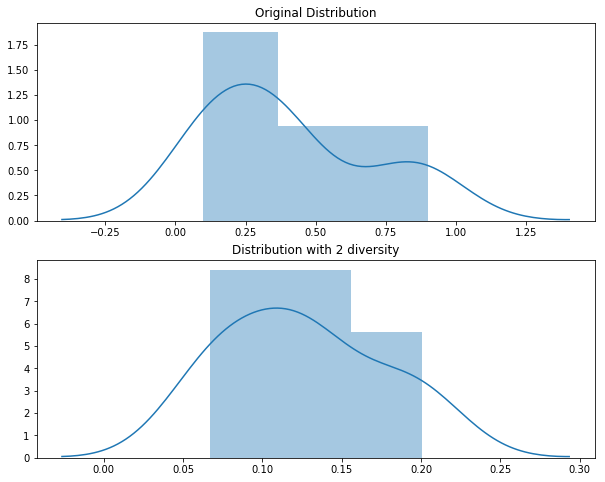

In [90]:
_ = diversify([0.1, 0.2, 0.4, 0.8, 0.9, 0.1, 0.3, 0.4], 2, plot = True)

'RDCNN.'

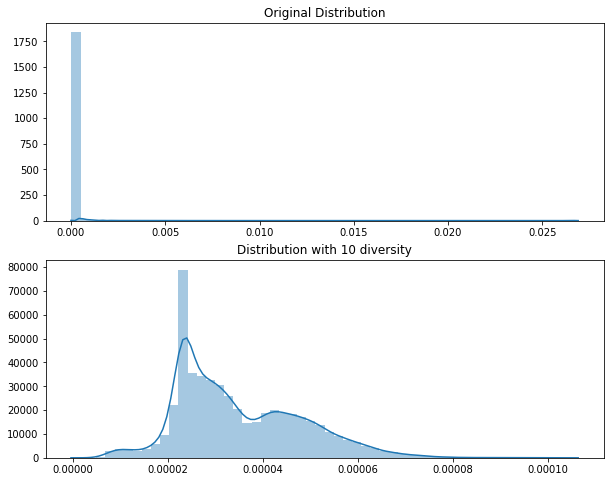

In [95]:
x = diversify(pred[0, 0, :], 10, True)
index_word[np.argmax(x)]

In [101]:
for d in np.arange(1, 5, 0.2):
    x = diversify(pred[0, 0, :], d)
    print(index_word[np.argmax(x)])

used
DNS
distance”
cryptographic
time,
chances
operator
neighbor
classifier
structure.
Internet-based
passive
one-way.
taste,
managed
turned.
full-scale
gun
crew
Control


'dictionary.'

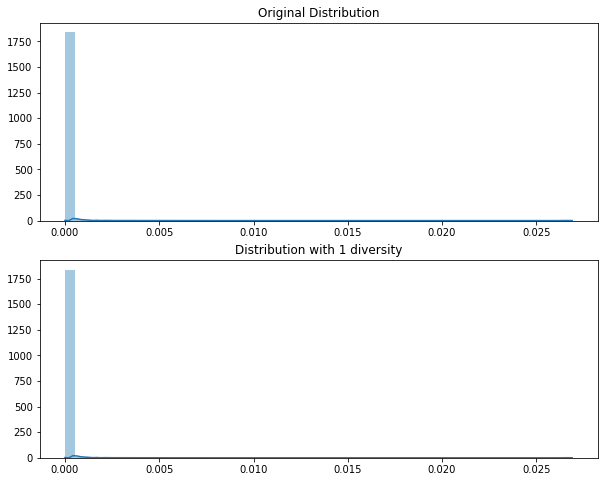

In [100]:
x = diversify(pred[0, 0, :], 1, True)
index_word[np.argmax(x)]

In [78]:
np.argmax(x)

19599

In [76]:
sorted_p = np.sort(pred)